# Ozone Level - Mt. Rainer
##### Rie Durnel and Kevin Olbright 
##### CPSC 322, Spring 2022

## Introduction 
For this project we chose the EPA's ozone and weather measurements for Mt. Rainer beginning in 2007.   
We were attempting to predict ozone levels based on the weather conditions at the time of measurement.  
#TODO: add the classifier results

## Data Analysis
Our dataset consisted almost entirely of continuous data. Even the non-continuous data was designed to be entirely unique. This meant that we were required to discritize our data in order to ensure that the desicion trees could be constructed or remove unique idenifiers before classifying the data.  
Initially, before cleaning, the dataset had 78888 instances. After removing rows with most of the column data missing, we were left with 36699 rows of data. This was too much for our machines to compute so we pruned the data until we were left with 1050 instances with each ozone level being represented and equal number of times. 

In [26]:
import importlib
import os

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myrandomforestclassifier 
importlib.reload(mysklearn.myrandomforestclassifier)
from mysklearn.myrandomforestclassifier import MyRandomForestClassifier

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyDecisionTreeClassifier, \
                MyNaiveBayesClassifier, MyKNeighborsClassifier

from mysklearn import myvisualization 
importlib.reload(myvisualization)

from mysklearn import myevaluation
importlib.reload(myevaluation)

continuous_data = MyPyTable()
continuous_data.load_from_file("meteorological-hourly-clean.csv")
discretized_data = MyPyTable()
discretized_data.load_from_file("meteorological-dataset.csv")


#### Temperature

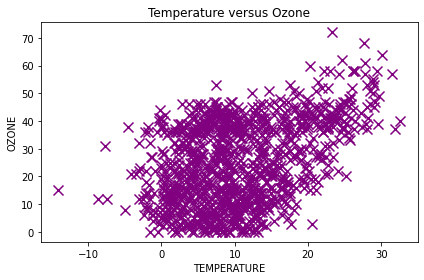

In [27]:
x_label = "TEMPERATURE"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Temperature versus Ozone"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


This graph of the Temperature versus Ozone shows a slight positive dependence between the two columns.  
Post discretization, the distribution of the Temperature values looked like the following.  

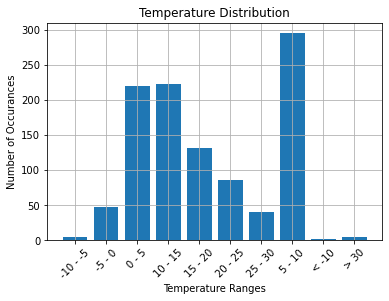

In [28]:
att_name = "Temperature"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Temperature Distribution"
x_label = "Temperature Ranges"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)


#### Relative Humidity 

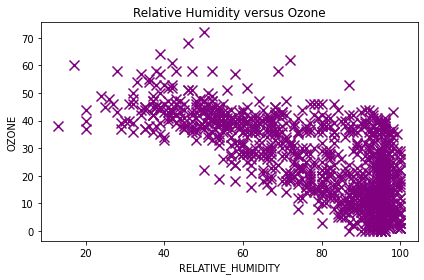

In [29]:
x_label = "RELATIVE_HUMIDITY"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Relative Humidity versus Ozone"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


The graph of the Relative Humidity versus the Ozone shows an inverse dependence between the two columns.  
After we discretized the data the distribution looks as follows. 

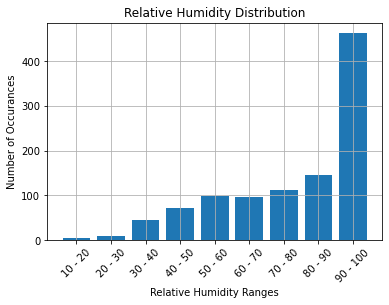

In [30]:
att_name = "Relative Humidity"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Relative Humidity Distribution"
x_label = "Relative Humidity Ranges"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Solar Radiation

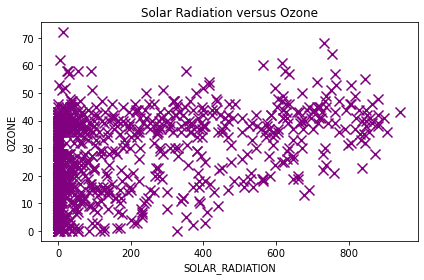

In [31]:
x_label = "SOLAR_RADIATION"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Solar Radiation versus Ozone"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


The graph of the Solar Radiation versus Ozone shows the slightest indication of a positive dependence between the attributes.  
The following graph is the distribute of our discretized data.  

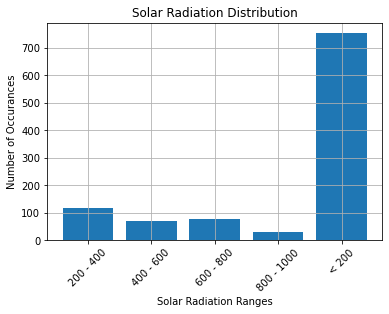

In [32]:
att_name = "Solar Radiation"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Solar Radiation Distribution"
x_label = "Solar Radiation Ranges"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Precipitation

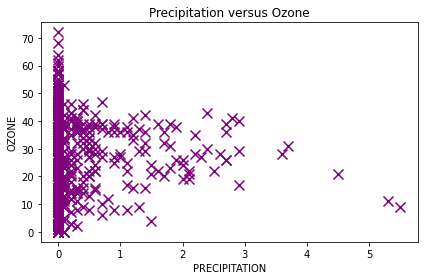

In [33]:
x_label = "PRECIPITATION"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Precipitation versus Ozone"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


Most of the values for the Precipitation column are in the same range which is shown in the above Precipitaion versus Ozone graph and the below distribution. 

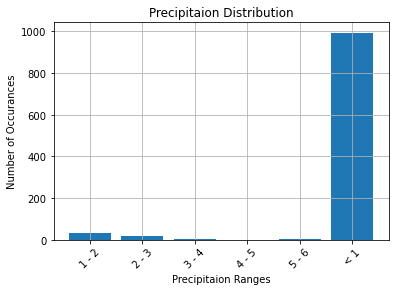

In [34]:
att_name = "Precipitaion"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Precipitaion Distribution"
x_label = "Precipitaion Ranges"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Wind Speed 

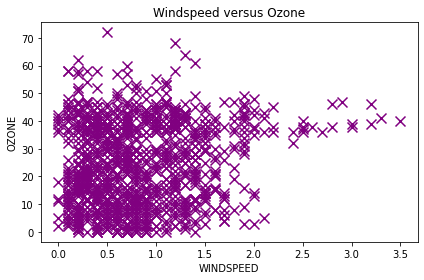

In [35]:
x_label = "WINDSPEED"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Windspeed versus Ozone"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


Once again, due to the clumped nature of the values, the Windspeed versus Ozone graph does not seem to show any dependences. This can be seen in the below bar graph of the Windspeed groups.

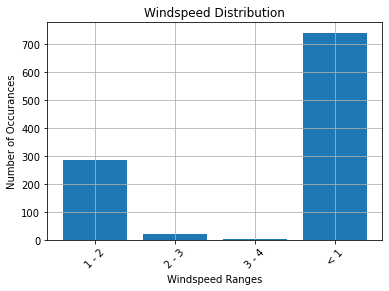

In [36]:
att_name = "Windspeed"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Windspeed Distribution"
x_label = "Windspeed Ranges"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Wind Direction

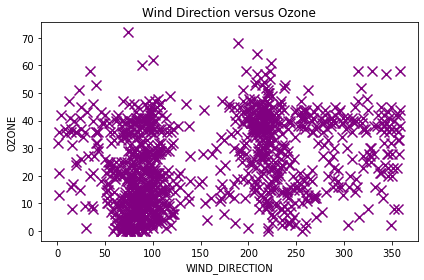

In [37]:
x_label = "WIND_DIRECTION"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Wind Direction versus Ozone"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


This colum shows the direction that the wind is approaching with 0 being North and moving clockwise around the points of the compass. While there doesn't seem to be a dependence between the two columns but we can see the most common wind directions to be around East and South-West. 

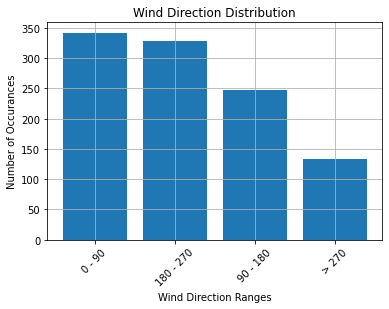

In [38]:
att_name = "Wind Direction"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Wind Direction Distribution"
x_label = "Wind Direction Ranges"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Shelter Temperature 

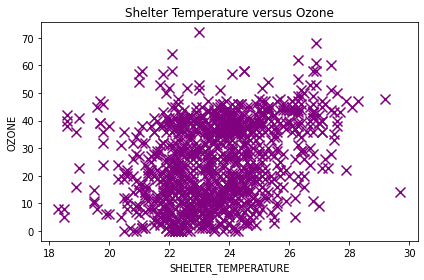

In [39]:
x_label = "SHELTER_TEMPERATURE"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)
title = "Shelter Temperature versus Ozone"
myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label, title=title)


The Shelter temperature is the temperature in the shelter where the measurement was taken. There does not seem to be a relationship between the temperature in the shelter and the Ozone level but if you squint there might be an argument for a positive one. The dicretized version of the data indicates that most of the values reside in the same ranges. 

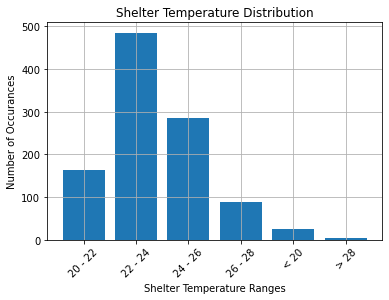

In [40]:
att_name = "Shelter Temperature"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Shelter Temperature Distribution"
x_label = "Shelter Temperature Ranges"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

#### Ozone

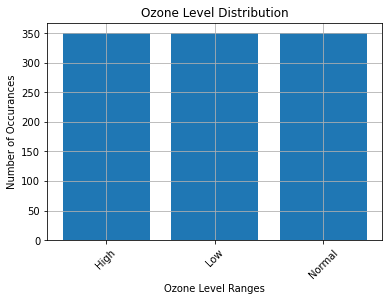

In [41]:
att_name = "Ozone Level"
att_vals = discretized_data.get_column(att_name)
unique_vals = myutils.find_unique_items(att_vals)
num_vals = myutils.count_unique_items(att_vals, unique_vals)
title = "Ozone Level Distribution"
x_label = "Ozone Level Ranges"
y_label = "Number of Occurances"
myutils.bar_chart(unique_vals, num_vals, title=title, xlabel=x_label, ylabel=y_label, rotation=45)

Due to the large size of our data we cut the values down until there were an equal number of each class value and a total number of 1050 instaces. This was so we could easily see how the classifiers handled each type of class result. 

## TODO 
Apparently we need figure labels. Not entirely sure how to do that

## Classification

We used four different classifiers to classify the data and compared them to determine the best classifier for our data.  

We used two different datasets for the classification For the Random Forest, Decision Tree, and Naive-Bayes classifiers we used a discretized dataset and for the kNN classifier we used the original continuous dataset.  
We made the decision to do this because the kNN has the unique ability to handle contiuous data so in order to have each classifier perform the best it could we used the differing datasets.  
That being said, the datsets were parallel so we used the same instances for the train and test sets to ensure the most accurate comparison. 

In [42]:
contiuous_names = ["TEMPERATURE","RELATIVE_HUMIDITY","SOLAR_RADIATION","PRECIPITATION","WINDSPEED","WIND_DIRECTION","FLOW_RATE","WINDSPEED_SCALAR","SHELTER_TEMPERATURE","OZONE"]
contiuous_att_data = continuous_data.get_multiple_columns(contiuous_names, "", False)
contiuous_class_data  = continuous_data.get_column("OZONE_LEVEL")

train_folds, test_folds = myevaluation.stratified_kfold_cross_validation(contiuous_att_data.data, contiuous_class_data, n_splits=10, random_state=None, shuffle=True)

contiuous_att_train_data = myutils.create_empty_list(len(train_folds))
contiuous_att_test_data = myutils.create_empty_list(len(train_folds))
contiuous_class_train_data = myutils.create_empty_list(len(train_folds))
contiuous_class_test_data = myutils.create_empty_list(len(train_folds))

for i,_ in enumerate(train_folds):
    contiuous_att_train_data[i] = myutils.indexes_to_values(train_folds[i], contiuous_att_data.data)
    contiuous_att_test_data[i] = myutils.indexes_to_values(test_folds[i], contiuous_att_data.data)
    contiuous_class_train_data[i] = myutils.indexes_to_values(train_folds[i], contiuous_class_data)
    contiuous_class_test_data[i] = myutils.indexes_to_values(test_folds[i], contiuous_class_data)

contiuous_class_labels = myutils.find_unique_items(contiuous_class_data)


In [43]:
discretized_names = ["Month","Temperature","Relative Humidity","Solar Radiation","Precipitaion","Windspeed","Wind Direction","Shelter Temperature"]
discretized_att_data = discretized_data.get_multiple_columns(discretized_names, "", False)
discretized_class_data = discretized_data.get_column("Ozone Level")

discretized_att_train_data = myutils.create_empty_list(len(train_folds))
discretized_att_test_data = myutils.create_empty_list(len(train_folds))
discretized_class_train_data = myutils.create_empty_list(len(train_folds))
discretized_class_test_data = myutils.create_empty_list(len(train_folds))

for i,_ in enumerate(train_folds):
    discretized_att_train_data[i] = myutils.indexes_to_values(train_folds[i], discretized_att_data.data)
    discretized_att_test_data[i] = myutils.indexes_to_values(test_folds[i], discretized_att_data.data)
    discretized_class_train_data[i] = myutils.indexes_to_values(train_folds[i], discretized_class_data)
    discretized_class_test_data[i] = myutils.indexes_to_values(test_folds[i], discretized_class_data)

discretized_class_labels = myutils.find_unique_items(discretized_class_data)


#### Random Forest Classifier

In [48]:
classifier = MyRandomForestClassifier(n_val=100, m_val=10, f_val=2)
rf_y_pred, rf_y_true = myutils.perform_classification_on_folds(classifier, discretized_att_train_data, discretized_class_train_data, discretized_att_test_data, discretized_class_test_data)
print("Random Forest Classifier Analysis: ")
%time myutils.perform_analysis_on_classification(rf_y_true, rf_y_pred, discretized_class_labels, ["Ozone Group"])
print()

Random Forest Classifier Analysis: 
Accuracy:  0.6342857142857142
Error Rate:  0.3657142857142857
Precision:  0.7064676616915423
Recall:  0.8114285714285714
F1 measure:  0.75531914893617
Confusion Matrix
-------------------------------
Ozone Group      High    Low    Normal    Total    Recongnition (%)
-------------  ------  -----  --------  -------  ------------------
High              284     21        45      350             81.1429
Low                14    256        80      350             73.1429
Normal            104    120       126      350             36
CPU times: user 38.9 ms, sys: 10 ms, total: 48.9 ms
Wall time: 37.5 ms



Overview:  
The random forest classifier takes in training data both x and y data. It then used the bootstrap method to divide the data into training and varification data. The classifier is then run on the training data to create the tree. The trees vary from normal decision trees because the number of attributes avalible for spliting is limited to a maximum of the F value. The tree is then validated using the remaining data. The accuracy is then checked for the tree and both the tree and the resulting accuracy are stored. This process of bottstraping the data and validating it is repeated until N number of trees are created. Afterwards the M number of trees with the highest accuracy are stored as the final forest for future predictions.  
When a true prediction is required, the testing values are passed into the forest predict method. The predict is then called for each indivivual tree and the results are stored. The final prediction is the majority vote of the individual trees. 

Result:  
The random forest classifier takes the most amount of time to run. For each stratified fold the classifier must make N number of trees and test each one. For predict it is nearly the same due to the fact that the classifier much perform prediction M number of times and the find the most common prediction for each unknown value. On our machines and in the docker container, the random forest classifier takes way to much time to be much use on larger datasets.  
For recongnition we were getting very high values for the high and low classes but low for the normal class. This lowers the effectiveness of the classifier. 

#### Decision Tree Classifier

In [51]:
dt_y_pred, dt_y_true = myutils.perform_classification_on_folds(MyDecisionTreeClassifier(), discretized_att_train_data, discretized_class_train_data, discretized_att_test_data, discretized_class_test_data)
print("Decision Tree Classifier Analysis: ")
%time myutils.perform_analysis_on_classification(dt_y_true, dt_y_pred, discretized_class_labels, ["Ozone Group"])
print()

Decision Tree Classifier Analysis: 
Accuracy:  0.6342857142857142
Error Rate:  0.3657142857142857
Precision:  0.7128953771289538
Recall:  0.8371428571428572
F1 measure:  0.7700394218134033
Confusion Matrix
-------------------------------
Ozone Group      High    Low    Normal    Total    Recongnition (%)
-------------  ------  -----  --------  -------  ------------------
High              293     21        36      350             83.7143
Low                12    261        77      350             74.5714
Normal            106    132       112      350             32
CPU times: user 25.3 ms, sys: 19 µs, total: 25.3 ms
Wall time: 20 ms



Overview:  
The decision tree takes in attribute data and class data and created a decision tree based on entropy. This is stored until the predict is called which results in the tree being recursively transversed until a leaf node is reached and the found class is returned. 

Result:  
The decision tree classifier is significatly faster than the random forest but results is about the same recongnition as the random forest distribution which raises questions regarding the usefulness of the random forest classifier

#### kNN Classifier

In [46]:
knn_y_pred, knn_y_true = myutils.perform_classification_on_folds(MyKNeighborsClassifier(), contiuous_att_train_data, contiuous_class_train_data, contiuous_att_test_data, contiuous_class_test_data)
print("kNN Classifier Analysis: ")
%time myutils.perform_analysis_on_classification(knn_y_true, knn_y_pred, discretized_class_labels, ["Ozone Group"])
print()


kNN Classifier Analysis: 
Accuracy:  0.7895238095238095
Error Rate:  0.21047619047619048
Precision:  0.829971181556196
Recall:  0.8228571428571428
F1 measure:  0.8263988522238163
Confusion Matrix
-------------------------------
Ozone Group      High    Low    Normal    Total    Recongnition (%)
-------------  ------  -----  --------  -------  ------------------
High              288      2        60      350             82.2857
Low                 3    298        49      350             85.1429
Normal             56     51       243      350             69.4286
CPU times: user 6.11 ms, sys: 0 ns, total: 6.11 ms
Wall time: 5.56 ms



Overview:  
The kNN classifier takes in a list of x and y training data and stores it. When the predict is called, the classifier calculates the distance between the test instance and each train instance. The closest neighbors are seperated and the classes of those train instances are voted on and the resulting class is the predicted value for the test instance. 

Result:  
The kNN classifier takes sometime to run since the number of calculations it needs to do goes up significatly as more data is added. That being said, for the amount of data we had, it ran reasonably fast as compared to the random forest classifier.  
What really sets it apart is the recognition of all the classes. The recognition for the high and low class are about the same as the tree and forest classifiers but the recognition for the normal class label is about double that of the tree based classifiers. This is most likely due to the contiuous aspect of the data. When the discretization of the data is done, we lose a lot of information and thus a lot of the predictive power. 

#### Naive Bayes Classifier

In [47]:
nb_y_pred, nb_y_true = myutils.perform_classification_on_folds(MyNaiveBayesClassifier(), discretized_att_train_data, discretized_class_train_data, discretized_att_test_data, discretized_class_test_data)
print("Naive-Bayes Classifier Analysis: ")
%time myutils.perform_analysis_on_classification(nb_y_true, nb_y_pred, discretized_class_labels, ["Ozone Group"])
print()


ValueError: '5 - 6' is not in list

## Conclusion